This file aims to take the cleaned data acquired from the base data sets and transform it into a format that can be used for our machine learning purposes. This particular dataset will focus on vehicular pickup and dropoff traffic from New York taxis and FHVs. The general formatting involves looking at the various taxi zones, and counting the pickups and dropoffs that occur in each during one hour increments. Weather data is also provided for each hour. This should allow a machine learning model to predict busyness in a particular area given the time, weather, and taxi zone as inputs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Pickup taxi zones, dropoff taxi zones, and merged

pickup = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265]

dropoff = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265]

full_zones = list(set(pickup + dropoff))

clean_zones = list(dict.fromkeys(full_zones))

print(f'Length of pickup list: {len(pickup)}\nLength of dropoff list: {len(dropoff)}\nFull taxi zone list length: {len(full_zones)}\nFull taxi zone list: {full_zones}')

Length of pickup list: 262
Length of dropoff list: 263
Full taxi zone list length: 263
Full taxi zone list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

In [3]:
#Read data frame from csv file

tdf = pd.read_csv('C:/Users/mattx/Downloads/data/cleaned data/cleaned_taxi_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, low_memory=False)

#Read size from csv

tdf.shape

(24648499, 14)

In [4]:
#Basic information on dataframes features and feature types

tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24648499 entries, 0 to 24648498
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        float64
 3   PULocationID           int64  
 4   DOLocationID           int64  
 5   week                   object 
 6   PUday                  int64  
 7   PUmonth                int64  
 8   PUyear                 int64  
 9   DOday                  int64  
 10  DOmonth                int64  
 11  DOyear                 int64  
 12  PUhour                 int64  
 13  DOhour                 int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 2.6+ GB


In [6]:
#grouping taxi data by hour and getting counts for each zone for pickups

tempdfPU = pd.DataFrame({'pickup_count' : tdf.groupby(['PUday','PUmonth', 'PUyear', 'PUhour', 'week', 'PULocationID'])['PULocationID'].count()}).reset_index()

print("First 5 rows:")
print(tempdfPU.head())
print("Last 5 rows:\n")
print(tempdfPU.tail())


#grouping taxi data by hour and getting counts for each zone for dropoffs

tempdfDO = pd.DataFrame({'dropoff_count' : tdf.groupby(['DOday','DOmonth', 'DOyear', 'DOhour', 'DOLocationID'])['DOLocationID'].count()}).reset_index()

print("First 5 rows:")
print(tempdfPU.head())
print("Last 5 rows:\n")
print(tempdfPU.tail())


#changing names to facilitate left join

tempdfPU = tempdfPU.rename(columns={'PUyear':'year', 'PUmonth':'month', 'PUday':'day','PUhour':'hour','PULocationID':'taxi_zone'})
tempdfDO = tempdfDO.rename(columns={'DOyear':'year', 'DOmonth':'month', 'DOday':'day','DOhour':'hour','DOLocationID':'taxi_zone'})


#Performing a left join on the two datasets

joindf = pd.merge(tempdfPU, tempdfDO, how='left', left_on=['year', 'month', 'day', 'hour', 'taxi_zone'], right_on=['year', 'month', 'day', 'hour', 'taxi_zone'])

print("First 5 rows:")
print(joindf.head())
print("Last 5 rows:\n")
print(joindf.tail())

First 5 rows:
   PUday  PUmonth  PUyear  PUhour       week  PULocationID  pickup_count
0      1        1    2003       0  Wednesday           193             1
1      1        1    2009       0   Thursday            43             2
2      1        1    2009       0   Thursday            68             1
3      1        1    2009       0   Thursday            78             1
4      1        1    2009       0   Thursday            79             2
Last 5 rows:

        PUday  PUmonth  PUyear  PUhour      week  PULocationID  pickup_count
937890     31       12    2020      23  Thursday           261             4
937891     31       12    2020      23  Thursday           262             9
937892     31       12    2020      23  Thursday           263            36
937893     31       12    2020      23  Thursday           264            14
937894     31       12    2020      23  Thursday           265             7
First 5 rows:
   PUday  PUmonth  PUyear  PUhour       week  PULocationID

In [7]:
#importing weather data to be merged

wdf = pd.read_csv('C:/Users/mattx/Downloads/data/cleaned data/cleaned_weather_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, low_memory=False)

#Read size from csv

wdf.shape

(19005, 25)

In [9]:
#Cutting weather data down to essential columns only: datetime, temperature, feels like, weather_main

wdf = wdf[['year', 'month', 'day', 'hour', 'temp', 'feels_like', 'weather_main']]

In [10]:
#Basic information on dataframes features and feature types

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19005 entries, 0 to 19004
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          19005 non-null  int64  
 1   month         19005 non-null  int64  
 2   day           19005 non-null  int64  
 3   hour          19005 non-null  int64  
 4   temp          19005 non-null  float64
 5   feels_like    19005 non-null  float64
 6   weather_main  19005 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ MB


In [11]:
#joining weather df into joindf

joindf = pd.merge(joindf, wdf, how='left', left_on=['year', 'month', 'day', 'hour'], right_on=['year', 'month', 'day', 'hour'])

print("First 5 rows:")
print(joindf.head())
print("Last 5 rows:\n")
print(joindf.tail())

First 5 rows:
   day  month  year  hour       week  taxi_zone  pickup_count  dropoff_count  \
0    1      1  2003     0  Wednesday        193             1            NaN   
1    1      1  2009     0   Thursday         43             2            NaN   
2    1      1  2009     0   Thursday         68             1            NaN   
3    1      1  2009     0   Thursday         78             1            1.0   
4    1      1  2009     0   Thursday         79             2            NaN   

   temp  feels_like weather_main  
0   NaN         NaN          NaN  
1   NaN         NaN          NaN  
2   NaN         NaN          NaN  
3   NaN         NaN          NaN  
4   NaN         NaN          NaN  
Last 5 rows:

         day  month  year  hour      week  taxi_zone  pickup_count  \
1013944   31     12  2020    23  Thursday        261             4   
1013945   31     12  2020    23  Thursday        262             9   
1013946   31     12  2020    23  Thursday        263            36   
1

In [12]:
#Basic information on dataframes features and feature types

joindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013949 entries, 0 to 1013948
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   day            1013949 non-null  int64  
 1   month          1013949 non-null  int64  
 2   year           1013949 non-null  int64  
 3   hour           1013949 non-null  int64  
 4   week           1013949 non-null  object 
 5   taxi_zone      1013949 non-null  int64  
 6   pickup_count   1013949 non-null  int64  
 7   dropoff_count  858214 non-null   float64
 8   temp           1013836 non-null  float64
 9   feels_like     1013836 non-null  float64
 10  weather_main   1013836 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 92.8+ MB


In [13]:
#Casting categorical feature properly

joindf['day'] = joindf['day'].astype(object)
joindf['month'] = joindf['month'].astype(object)
joindf['year'] = joindf['year'].astype(object)
joindf['hour'] = joindf['hour'].astype(object)
joindf['taxi_zone'] = joindf['taxi_zone'].astype(object)

In [22]:
#Grouping continuous and categorical features

categorical = ['taxi_zone', 'year', 'month', 'day', 'week', 'hour','weather_main']
continuous = ['pickup_count', 'dropoff_count',  'temp', 'feels_like']

In [15]:
#Checking for missing values

full = list(joindf)

for item in full:
    percent_missing = joindf[item].isnull().sum() * 100 / len(joindf)
    print(f'{item}: {percent_missing}')
    
#There is a fair amount of missing data in dropoff count, and a miniscule amount of missing data in temp, feels_like, and weather_main
#Null dropoff count will be set to 0, as this likely represents dropoffs that occured outside of Manhattan
#Null weather data will be deleted, as it is not a sigificant amountof data, and would spoil the machine learning
#Erroneous data (I.E. dates outside of the original datetime range) will also be deleted

joindf['dropoff_count'] = joindf['dropoff_count'].fillna(0)
joindf = joindf[joindf['temp'].notna()]
joindf = joindf[joindf['feels_like'].notna()]
joindf = joindf[joindf['weather_main'].notna()]

day: 0.0
month: 0.0
year: 0.0
hour: 0.0
week: 0.0
taxi_zone: 0.0
pickup_count: 0.0
dropoff_count: 15.359253769173796
temp: 0.011144544745347153
feels_like: 0.011144544745347153
weather_main: 0.011144544745347153


In [16]:
#Rechecking for missing values

full = list(joindf)

for item in full:
    percent_missing = joindf[item].isnull().sum() * 100 / len(joindf)
    print(f'{item}: {percent_missing}')

day: 0.0
month: 0.0
year: 0.0
hour: 0.0
week: 0.0
taxi_zone: 0.0
pickup_count: 0.0
dropoff_count: 0.0
temp: 0.0
feels_like: 0.0
weather_main: 0.0


In [17]:
#adding pickup and dropoff counts together. Our group has decided that the division between the two is arbitrary, as both indicate vehicle and foot traffic

joindf['activity'] = joindf['pickup_count'] + joindf['dropoff_count']


#dropping redundant columns

joindf = joindf.drop(columns=['pickup_count', 'dropoff_count'])

In [18]:
#mapping weekdays to numeric representation for the purpose of machine learning

mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6 }

joindf = joindf.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [19]:
#mapping values for weather main to numeric representation for the purpose of machine learning

print(sorted(joindf['weather_main'].unique()))

#dictionary holding k:v pairs for weather states

mapping = {'Clear':1, 'Clouds':2, 'Drizzle': 3, 'Fog':4, 'Haze': 5, 'Mist':6, 'Rain': 7, 'Smoke': 8, 'Snow': 9, 'Squall': 10, 'Thunderstorm': 11}

#replacing values with mapped numbers

joindf = joindf.applymap(lambda s: mapping.get(s) if s in mapping else s)

['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow', 'Squall', 'Thunderstorm']


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'activity'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'week'}>,
        <AxesSubplot:title={'center':'feels_like'}>, <AxesSubplot:>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'taxi_zone'}>,
        <AxesSubplot:title={'center':'weather_main'}>, <AxesSubplot:>]],
      dtype=object)

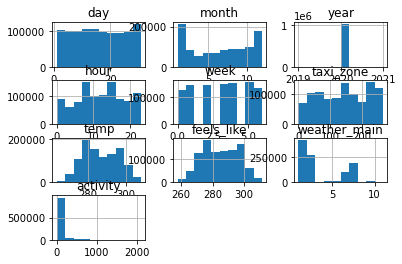

In [20]:
#Plot histograms for continuous features

joindf.hist().T

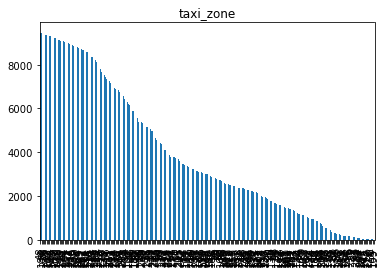

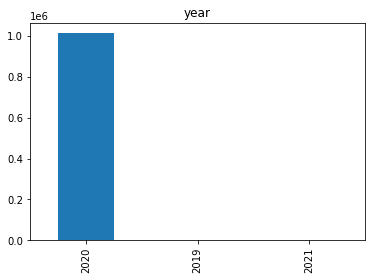

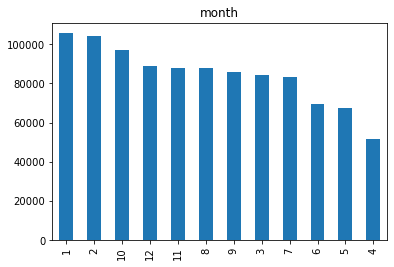

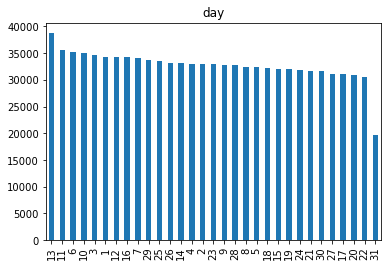

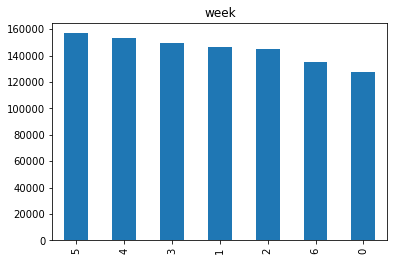

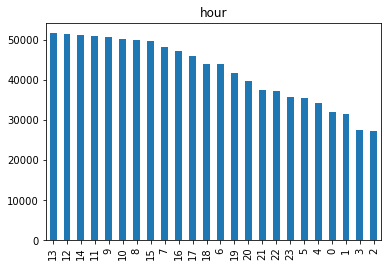

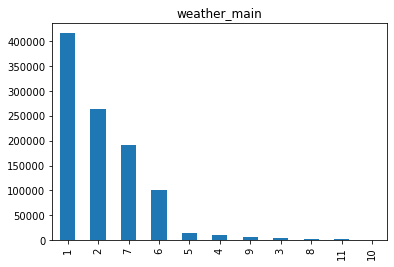

In [23]:
#Plot bar plots for categorical features

for item in categorical:
    joindf[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()

In [24]:
#Saving cleaned frame to CSV

joindf.to_csv('ml_ready_df.csv', index=False)